<a href="https://colab.research.google.com/github/swampxx/DistanceBasedLearning/blob/master/DistanceBasedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [0]:
#!rm -r CMANN
#!git clone https://github.com/Orkun-tanik/CMANN.git

rm: cannot remove 'CMANN': No such file or directory
Cloning into 'CMANN'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


#Omniglot

*The Omniglot* dataset is a collection of 1623 hand drawn characters from 50 alphabets. For every character there are just 20 examples, each drawn by a different person at resolution 105x105.

In [0]:
#!unzip CMANN/images_evaluation.zip
#!unzip CMANN/images_background.zip

"""  Do not execute again!!  """

In [0]:
# Imports

import os
import numpy as np
import matplotlib.image as mpimg

In [0]:
def to_origin(image):
    """
       Image: Black pixels labeled as True
        
       It moves the image towards the origin,
                returns new_image and black pixels coordinates array: (new_image,blacks)  
                
    """

    x,y = image.shape
    xshift = x
    yshift = y

    blacks = []

    for i in range(x):
        for j in range(y):
            if image[i][j] == True:
                blacks.append((i,j))
                if i<xshift:
                    xshift = i
                if j<yshift:
                    yshift = j

    new_image = np.zeros(shape=(x,y))

    for i in range(len(blacks)):
        (a,b) = blacks[i]
        blacks[i] = (a-xshift, b-yshift)
        new_image[a-xshift][b-yshift] = 1
    
    blacks = np.array(blacks)

    return (new_image, blacks)

In [0]:

data_path = ""
train_path = os.path.join(data_path,'images_background')
validation_path = os.path.join(data_path,'images_evaluation')



def load_images_from_directory(path):
    X=[]

    ## We load every alphabet seperately and append that to one tensor
    for alphabet in os.listdir(path):
        #print("loading alphabet: " + alphabet)
        alphabet_path = os.path.join(path,alphabet)
        
        ## Each character in alphabet is in a separate folder
        for letter in os.listdir(alphabet_path):
            #print(" + letter: " + letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
        
            
            if not os.path.isdir(letter_path):
                continue

            ## Read every image in this directory
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = mpimg.imread(image_path)
                #print(image)
                
                
                #TODO: recreate images with black pixels coordinate values
                
                
                ### Image preprocessing!
                #image = image/255
                #image = 1-image
                
                image = np.logical_not(image)
                #print("prepocessing image...")
                
                new_image, _ = to_origin(image)
                
                
                #print("done.")
                #print(image)           
                
                category_images.append(new_image)
            
            try:
                X.append(np.array(category_images))
            #edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
    
    X = np.array(X)

    return X




In [0]:
print("Loading training set")
Xtrain = load_images_from_directory(train_path)
print(Xtrain.shape)

print("Now loading evaluation set")
Xval = load_images_from_directory(validation_path)
print(Xval.shape)

In [0]:
np.set_printoptions(threshold=np.inf)
print(Xtrain[0,0])

In [0]:
np.save('Xtrain.npy', Xtrain)
np.save('Xval.npy', Xval)

In [0]:
Xtrain = np.load("Xtrain.npy")
Xval = np.load("Xval.npy")

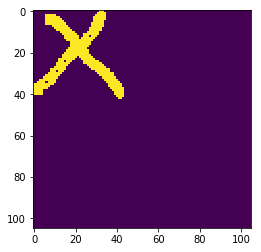

In [30]:
#@title Example Image to be displayed { run: "auto" }
import matplotlib.pyplot as plt

character = 270 #@param {type:"integer"}
drawing = 16 #@param {type:"slider", min:0, max:19, step:1}
image_set = 'Xtrain' #@param ["Xval", "Xtrain"]

if (image_set == 'Xval'):
    imgplot = plt.imshow(Xval[character,drawing])
else:
    imgplot = plt.imshow(Xtrain[character,drawing])

# Latin Images

In [203]:

latin_path = "Latin"
#latin_path_evaluation = "images_evaluation"

print("Loading Latin alphabet..")
latin = load_images_from_directory(latin_path)
print(latin.shape)

Loading Latin alphabet..
(26, 20, 105, 105)


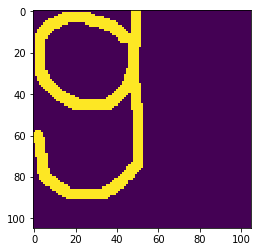

In [204]:
#@title Latin Images { run: "auto" }
import matplotlib.pyplot as plt

character = 0 #@param {type:"slider", min:0, max:25, step:1}
drawing = 0 #@param {type:"slider", min:0, max:19, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(latin[character,drawing])


In [0]:
# Extract random samples from each character of given alphabet

def get_sample(alphabet):
    
    # alphabet numpy array [size, drawing, 105, 105]
    
    # returns samples and altered alphabet
    character_count, drawing_count, _, _ = alphabet.shape
    samples = []
    new_alphabet = []    
    for i in range(character_count):
        rand = np.random.randint(0,drawing_count)
        samples.append(alphabet[i,rand])
        new_alphabet.append(np.delete(alphabet[i], rand, 0))  
    
    
    samples = np.array(samples)
    new_alphabet = np.array(new_alphabet)
    
    return samples, new_alphabet

In [0]:
# Extract samples from latin alphabet
samples, new_latin = get_sample(latin)

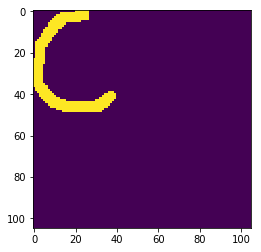

In [172]:
#@title Sample Latin Images { run: "auto" }
import matplotlib.pyplot as plt

character = 24 #@param {type:"slider", min:0, max:25, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(samples[character])

***These sample latin images will be used for testing distance functions. ***

# Experiments


---


*In this section,  there are experiments of distance functions for one-shot learning . Follow the headers for distance functions properties.*



---



## Elementary Distance Functions

---
* Minkowski Family
> *   Euclidean 
> *   Manhattan
> *  LP Norm Distance Function

* Angular Distance Functions
>* Cosine Similarity

### Euclidean
---
Euclidean distance is a special case of Minkowski distance with $\lambda=2$

$Euclidean(\vec{x}, \vec{y}):= \sqrt{\sum_i(x_i-y_i)^2}$

In this section, we will consider only the euclidean distance between images, namely only euclidean distance is used for classify latin characters.

(26, 20, 105, 105)
standard euclidean distance:  33.45145736735546


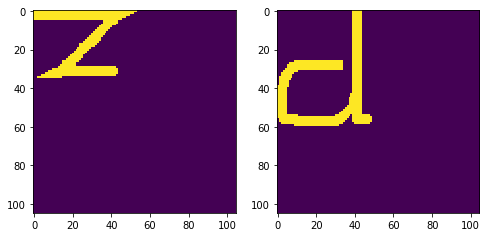

In [237]:
#@title Standard Euclidean Distance Function { run: "auto" }
#@markdown It transforms images to 1D vectors by numpy flatten function
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

def euclidean_distance_std(x,y):
    """
        params: x and y images
        
        To apply eucl. distance It transforms images to 1D vectors by numpy.flatten()
        
        return: euclidean distance between two images
       
    """
    
    
    vector_1 = x.flatten()
    vector_2 = y.flatten()
    
    return euclidean(vector_1, vector_2)

character1 = 16 #@param {type:"slider", min:0, max:25, step:1}
drawing1 = 7 #@param {type:"slider", min:0, max:19, step:1}

character2 = 7 #@param {type:"slider", min:0, max:25, step:1}
drawing2 = 4 #@param {type:"slider", min:0, max:18, step:1}

#image_set = 'Latin' #@param ["Xval", "Xtrain"]
print(latin.shape)
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(new_latin[character1,drawing1])
fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(new_latin[character2,drawing2])


print("standard euclidean distance: ", euclidean_distance_std(new_latin[character1,drawing1],new_latin[character2,drawing2]))


36.24913792078372
